Titanic Spaceship Kaggle Competition
===================================

Bienvenido al año 2912, donde se necesitan sus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión de cuatro años de distancia y las cosas no se ven bien.

El Spaceship Titanic era un forro de pasajeros interestelar lanzado hace un mes. Con casi 13,000 pasajeros a bordo, la embarcación se dirigió a su viaje inaugural que transportaba a los emigrantes desde nuestro sistema solar a tres exoplanetas recién habitables que orbitan estrellas cercanas.

Mientras redondea alpha Centauri en el camino a su primer destino, el tórrido 55 CANCRI E, el inyecto de la nave espacial Titanic colisionó con una anomalía de espacio -tiempo oculta dentro de una nube de polvo. Lamentablemente, cumplió con un destino similar a su homónimo de 1000 años antes. Aunque el barco permaneció intacto, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

Para ayudar a los equipos de rescate y recuperar a los pasajeros perdidos, se le desafía a predecir qué pasajeros fueron transportados por la anomalía utilizando registros recuperados del sistema informático dañado de la nave espacial.

¡Ayuda a salvarlos y cambiar la historia!

In [4]:
import pandas as pd

DATA_FOLDER = "../data/spaceship-titanic/"
TRAIN_FILE_PATH = DATA_FOLDER + "train.csv"
TEST_FILE_PATH = DATA_FOLDER + "test.csv"
SAMPLE_SUBMISSION_FILE_PATH = "../data/spaceship-titanic/sample_submission.csv"

train_df = pd.read_csv(TRAIN_FILE_PATH)
test_df = pd.read_csv(TEST_FILE_PATH)

train_df.head(10)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


# EDA 

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_palette("hls")

## AGE DISTRIBUTION

<Axes: xlabel='Age', ylabel='Count'>

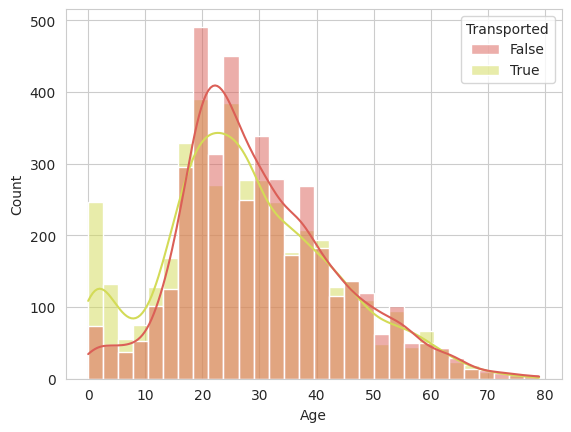

In [12]:
sns.histplot(data=train_df, x="Age", bins=30, kde=True, hue="Transported")

In [18]:
sns.barplot(data=train_df, x="homePlanet")

ValueError: Could not interpret value `homePlanet` for `x`. An entry with this name does not appear in `data`.

## PREPROCESSING

In [21]:
clean_train_df = train_df.dropna()

# Split

In [25]:
X = clean_train_df.select_dtypes(include=["number"])
X.head()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


In [26]:
y = clean_train_df["Transported"]
y

0       False
1        True
2       False
3       False
4        True
        ...  
8688    False
8689    False
8690     True
8691    False
8692     True
Name: Transported, Length: 6606, dtype: bool